<a href="https://colab.research.google.com/github/KARTIKPARATKAR/MACHINE-LEARNING-WORK/blob/main/CustomerSegmentationUsingClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Used - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

**Problem Statement-**

There is a mall where different kind of customers come for shopping. One group of customers tend to purchase a perticular things and another group of customerstend to purchase some another things. So we have group the customers so as to plan a better marketing stategy and better customer experiance.

**Workflow-**

customer_dataset --> Data Pre Processing --> Data Analysis --> Defining in how many clusters we want to split our dataset(WCSS-Within Cluster Sum of Square) --> Clustering Algorithm --> Visualize the cluster.

In [101]:
#Importing Dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors


In [102]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [103]:
print(customer_data)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [104]:
customer_data.shape  #It will give number of rows and columns

(200, 5)

In [105]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [106]:
#Checking for missing values in a dataset
#There is no null value
customer_data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [107]:
customer_data.head() #Here in dataset we have 5 columns.

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [108]:
#We will consider only 3rd and 4th column for training the clustering model
customer_data = customer_data.drop(['CustomerID','Genre','Age'],axis=1)

In [109]:
customer_data.head() #Here notice that columns - 'CustomerID','Genre' and 'Age' will be removed or dropped

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Choosing the number of Clusters:**

There are 200 datapoints in our dataset. We dont know the number of clusters that can this dataset be divided.So for deciding the number of clusters we use (Within Clusters Sum of Squares - WCSS)

In WCSS, It finds the distance between each datapoint and cetroid of the cluster.So to be a good cluster,the value of WCSS should be less.


In [110]:
#Finding WCSS values for different number of clusters
#random_state = 42 means everytime the code runs,data will be spitted the same way as it was splitted at the start.
#n_clusters defines the total number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(customer_data)
  wcss.append(kmeans.inertia_)



<function matplotlib.pyplot.show(close=None, block=None)>

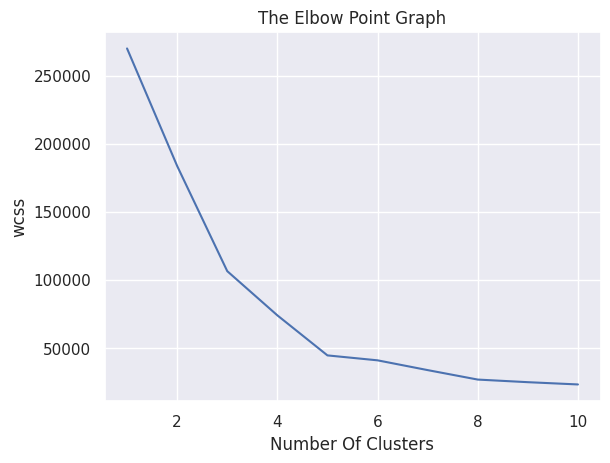

In [111]:
#Plotting an elbow graph
#This elbow point graph will help us to determine the value of k
#For this example we should take value of k as 5 because in elbow graph
#because after value 5 , the change in wcss vlue is very minimal.
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number Of Clusters')
plt.ylabel('wcss')
plt.show

**Optimum number of clusters are 5**

**Training the K-Means-Clustering Model-**

In [112]:
#First create a k-means clustering model with name of "k-means"
#n_clusters=5 means that we are defining no of clusters as 5
#init='k-means++ is an optimization method which leads to better clustering result
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=30)
#Now storing only two columns called 'Annual Income' and 'Spending Score' in customer_data
customer_data = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]
#Now fitting the k-means model to the selected features
#It also predicts which cluster each customer belongs to
customer_data['Cluster'] = kmeans.fit_predict(customer_data)
#This line will create new column called "Cluster" in the customer_data Dataframe
#Each customer row is assigned to a cluster number and stored in a column called 'Cluster'


In [113]:
print(customer_data['Cluster'])  #This is the classification of each customer-dat into different cluster which is stored in column 'Cluster'

0      4
1      1
2      4
3      1
4      4
      ..
195    3
196    0
197    3
198    0
199    3
Name: Cluster, Length: 200, dtype: int32


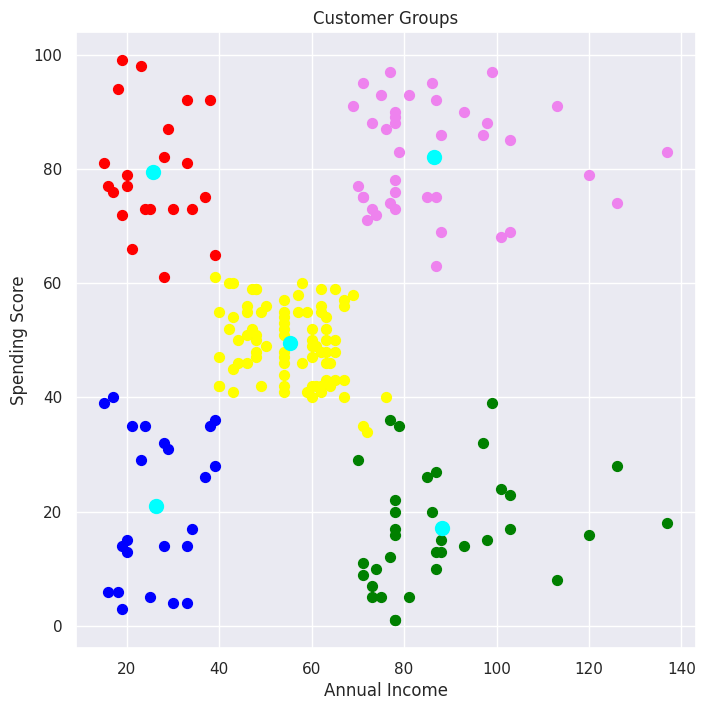

In [114]:
# plotting all the clusters and their Centroids

X = customer_data.iloc[:,:].values
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Interactive System-**

In [115]:

# Interactive Prediction Function
def predict_cluster(annual_income, spending_score):
    new_data = np.array([[annual_income, spending_score]])
    #Now predicting the cluster
    cluster_label = kmeans.predict(new_data)[0]
    cluster_color = cluster_colors[cluster_label]

    print(f"The user belongs to **Cluster {cluster_label + 1}** with color **{cluster_color}**")
    return cluster_label, cluster_color

# Take user input
income = float(input("Enter Annual Income: "))
score = float(input("Enter Spending Score: "))

# Predict and display result
cluster, color = predict_cluster(income, score)
print(f"Predicted Cluster: {cluster + 1} (Color: {color})")

Enter Annual Income: 50
Enter Spending Score: 50
The user belongs to **Cluster 3** with color **yellow**
Predicted Cluster: 3 (Color: yellow)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


**Evaluating the K-Means Clustering Model-**

For evaluating the unsuervised k-means clustering algorithm , we use **"Within Cluster Sum of Square(WCSS)".**  If WCSS is high it means clusters are not well-separated and if WCSS is low , the clusters are compact and well-formed.

In [116]:
print("WCSS(Inertia):",kmeans.inertia_)

WCSS(Inertia): 44448.45544793369


**Silhoulette Score-**

This score measures how well a data point fits within its cluster and range of Silhoulette Score is (-1,1)

In [117]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(customer_data[['Annual Income (k$)', 'Spending Score (1-100)']], customer_data['Cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.553931997444648


**Applying Hierarchical Clustering(Agglomerative Clustering)-**

In [118]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
customer_data['Cluster'] = agg_clustering.fit_predict(customer_data[['Annual Income (k$)', 'Spending Score (1-100)']])


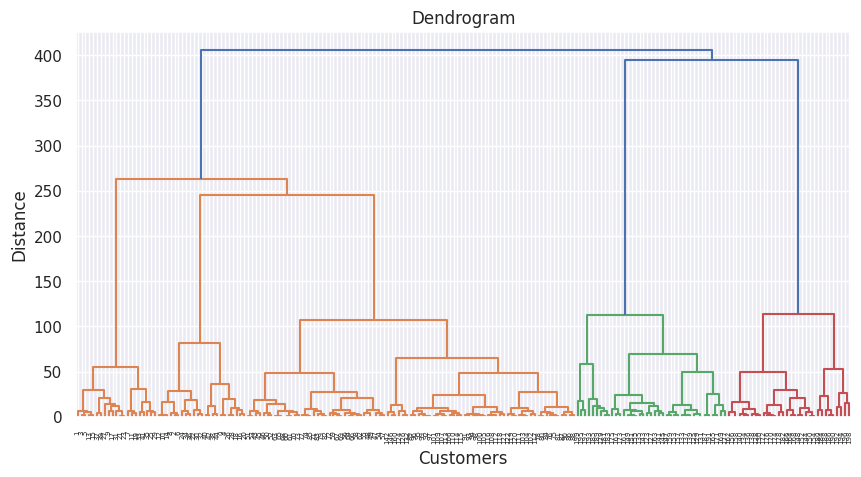

In [119]:
#Now visualizing Dendrogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(customer_data[['Annual Income (k$)', 'Spending Score (1-100)']], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


**Evaluating the Hierarchical Clustering Model-**


In [120]:
from sklearn.metrics import silhouette_score
import numpy as np

# Extract only features (Annual Income & Spending Score)
data_array = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Extract cluster labels
labels = customer_data['Cluster'].values

# Compute Silhouette Score
silhouette_avg = silhouette_score(data_array, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.5530


**Applying DBSCAN-Density Based Spatial clustering of application with noise-**

In [121]:
from sklearn.cluster import DBSCAN
#eps=Maximum distance between points to be cosidered part of a cluster
#min_sample=Minimum points required to form a cluster
dbscan = DBSCAN(eps=5, min_samples=5)
customer_data['Cluster'] = dbscan.fit_predict(customer_data[['Annual Income (k$)', 'Spending Score (1-100)']])


**Evaluating DBSCSN Model-**

In [122]:
from sklearn.metrics import silhouette_score
import numpy as np

# Extract feature data
data_array = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']].values
labels = customer_data['Cluster'].values

# Exclude noise points (-1)
mask = labels != -1
filtered_data = data_array[mask]
filtered_labels = labels[mask]

# Compute silhouette score if at least 2 clusters exist
if len(np.unique(filtered_labels)) > 1:
    silhouette_avg = silhouette_score(filtered_data, filtered_labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Silhouette Score cannot be computed (only one cluster detected).")


Silhouette Score: 0.6182


**We got Silhouett score for k-means as 0.553931997444648 , Hierarchical clustering as 0.5530 and DBSCN as 0.6182.**

**Higher the value of Silhouett score (near to 1) indicates better clustering. We have higher Sil.Val. for DBSCAN algorithm so DBSCAN algorithm is best for the Customer Segmentation Problm.**